<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>

<font color='blue'>
<br />
Анатолий, доброго дня! рад приветствовать тебя опять)<br />
(а дальше шаболонная обязательная часть, как ты заметил по другим спринтам)
<br />    

<br />
Меня зовут Николай Шавлюго. <br />И на этом этапе твоего движения к новой профессии от меня будут комментарии по написанному коду. <br />Чтобы меньше "мусорить эфир" и чтобы максимально наглядно отделяться от основного кода, есть предложение условиться в некоторых обозначениях:<br /> <br />
<u><b>ТАКОЙ ШРИФТ</b></u> - всегда начало комментария <br />
<font color='green'>такой шрифт</font> - комментарии о том, что всё ОК <br/>
<font color='orange'>такой шрифт</font> - комментарии о том, что всё ОК по результату,<br> однако есть на что обратить внимание в плане применения техник, или есть способы сделать более короткий или быстрый код <br/>
<font color='red'>такой шрифт</font> - комментарии о том, что есть критичный момент, влияющий на бизнес-результат проекта.<br/>
</font><br /><br />
<font color='green'>Моей целью является не "уличить" в не знании, а просто высказать сверху твоих знаний - свой опыт, что бы ты мог использовать его для своего дальнейшего успеха) И очень здорово будет, если тебе удастся задавать вопросы, да и вообще - всячески доставать меня, если я по каким-то причинам не приму проект:) При этом, из своего опыта скажу, хорошо и важно, когда переписка ревьюера и студента - сохраняется на следующие проекты и даже на будущую практическую деятельность.<br>
<BR> В ПУТЬ!<br>

Вы аналитик российской авиакомпании F9, выполняющей внутренние пассажирские перевозки. Важно понять предпочтения пользователей, покупающих билеты на разные направления.

Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

**Шаг 1.  Аналитика средствами Python**

У вас есть файлы, в которых содержатся результаты запросов из предыдущих заданий.

**query_1.csv** — результат первого запроса. В нём содержится такая информация:

- *model* — **модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

**query_3.csv** — результат третьего запроса. В нём содержится такая информация:

- *city* — город;
- *average_flights* — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.

 Для этих двух наборов данных нужно:

- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.

**Шаг 2.  Проверка гипотезы средствами Python**

**query_last.csv** — результат последнего запроса. В нём следующая информация:

- *week_number* — **номер недели;
- *ticket_amount* — количество проданных билетов за неделю;
- *festival_week —* есть ли на этой неделе фестиваль;
- *festival_name —* название фестиваля.

Проверьте гипотезу: «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время».

Пороговое значение *alpha* задайте самостоятельно.

Поясните:

- Как вы формулировали нулевую и альтернативную гипотезы;
- Какой критерий использовали для проверки гипотез и почему.

# 1. Аналитика

In [380]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st

#### Импорт файлов

In [381]:
query_1 = pd.read_csv('/datasets/query_1.csv')
query_3 = pd.read_csv('/datasets/query_3.csv')
query_last = pd.read_csv('/datasets/query_last.csv')

#### изучить данные / типы данных на корректность

In [382]:
query_1.head(3)

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630


In [383]:
query_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


Nan, дублей нет. Данные корректны. Тип данных не меняю, все нормально

In [384]:
query_3.head(3)

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290


In [385]:
query_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [386]:
query_3.shape

(101, 2)

In [387]:
query_3.average_flights.describe()

count    101.000000
mean       5.494189
std       13.119790
min        1.000000
25%        2.000000
50%        3.000000
75%        5.870968
max      129.774194
Name: average_flights, dtype: float64

Nan, дублей нет, нулей нет. Данные корректны. Тип данных не меняю, все нормальною Очень большой максимум

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f451856b710>]],
      dtype=object)

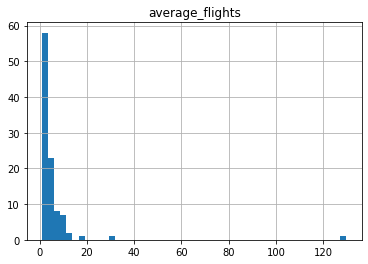

In [388]:
query_3.hist(bins = 50)

Выброс, надо убрать.

значение третьего квартиля + 2,5 * 3

In [389]:
query_3 = query_3[query_3.average_flights <= 9.98]

In [390]:
query_3

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


In [391]:
query_3.average_flights.describe()

count    93.000000
mean      3.477734
std       2.225421
min       1.000000
25%       2.000000
50%       3.000000
75%       4.580645
max       9.612903
Name: average_flights, dtype: float64

Нижнюю границу не трогаю

In [392]:
query_last.head(5)

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN


In [393]:
query_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
week_number      10 non-null int64
ticket_amount    10 non-null int64
festival_week    3 non-null float64
festival_name    3 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 448.0+ bytes


In [394]:
query_last['festival_week'] = query_last['festival_week'].fillna('0')

In [395]:
query_last['festival_week'] = query_last['festival_week'].astype('int')

festival_week тип поменял на int

In [396]:
query_last['festival_name'] = query_last['festival_name'].fillna('other')

пропуски заменил на other

In [397]:
query_last.describe()

,week_number,ticket_amount,festival_week
count,10.00000,10.000000,10.000000
mean,34.50000,50670.400000,9.700000
std,3.02765,2502.752716,15.691824
min,30.00000,43568.000000,0.000000
25%,32.25000,51364.500000,0.000000
50%,34.50000,51439.000000,0.000000
75%,36.75000,51596.750000,22.500000
max,39.00000,51675.000000,36.000000


#### Топ 10 городов по количеству рейсов

In [398]:
top_10_city = query_3.sort_values(by = 'average_flights', ascending = False).head(10)

In [399]:
top_10_city = top_10_city.reset_index()

In [400]:
top_10_city.drop('index', axis = 1)

,city,average_flights
0,Сочи,9.612903
1,Ульяновск,9.580645
2,Советский,9.000000
3,Сургут,8.741935
4,Ханты-Мансийск,8.419355
5,Новый Уренгой,8.290323
6,Казань,7.741935
7,Тюмень,6.967742
8,Челябинск,6.709677
9,Хабаровск,6.548387


### Графики

#### график «Модели самолётов и количество рейсов»

In [401]:
query_1.sort_values(by = 'flights_amount', ascending =False).head()

,model,flights_amount
6,Cessna 208 Caravan,4557
5,Bombardier CRJ-200,4446
7,Sukhoi SuperJet-100,4185
1,Airbus A321-200,960
2,Boeing 737-300,630


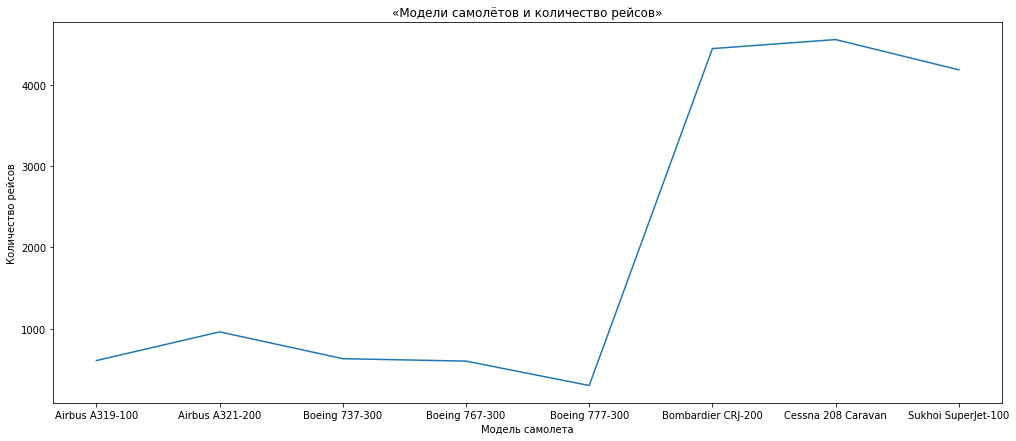

In [402]:
plt.figure(figsize=(17, 7))
plt.title("«Модели самолётов и количество рейсов»")
plt.xlabel("Модель самолета")
plt.ylabel("Количество рейсов")
plt.plot(query_1.model, query_1.flights_amount)
plt.show()

#### Вывод
При внутренних перевозках компания F9 доверет в большей степени трем моделям(с заметным отрывом)


    Cessna 208 Caravan	4557
    Bombardier CRJ-200	4446
    Sukhoi SuperJet-100	4185
___

#### график «Города и количество рейсов»

In [403]:
query_3 = query_3.sort_values(by = 'average_flights', ascending =True)

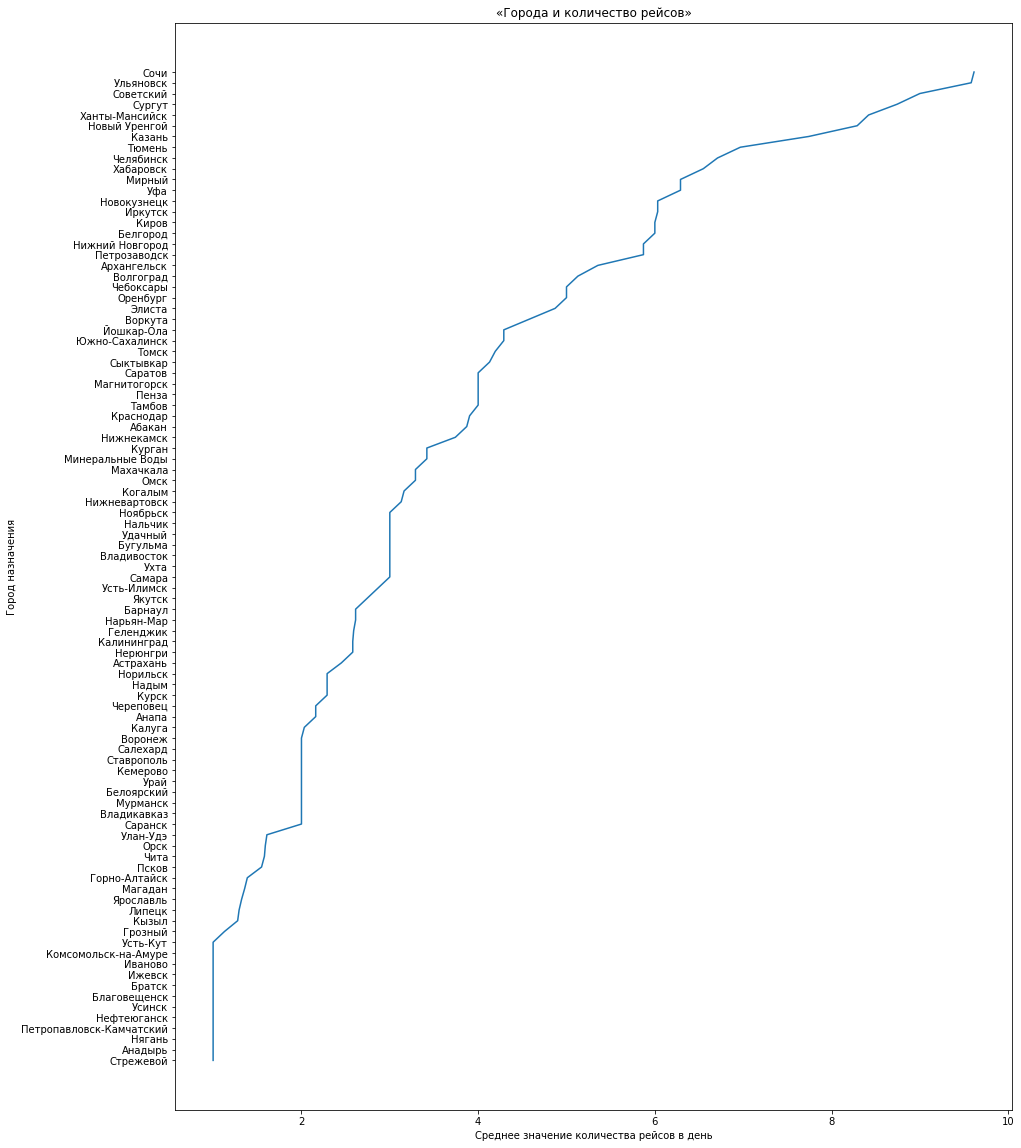

In [404]:
plt.figure(figsize=(15, 20))
plt.title("«Города и количество рейсов»")
plt.xlabel("Cреднее значение количества рейсов в день")
plt.ylabel("Город назначения")
plt.plot(query_3.average_flights, query_3.city)
plt.show()

#### Вывод
Внутренние перелеты неравноомерны. Есть популярные маршруты, есть не популярные.
___

#### график «Топ-10 городов и количество рейсов»

In [405]:
top_10_city = top_10_city.drop('index', axis = 1)

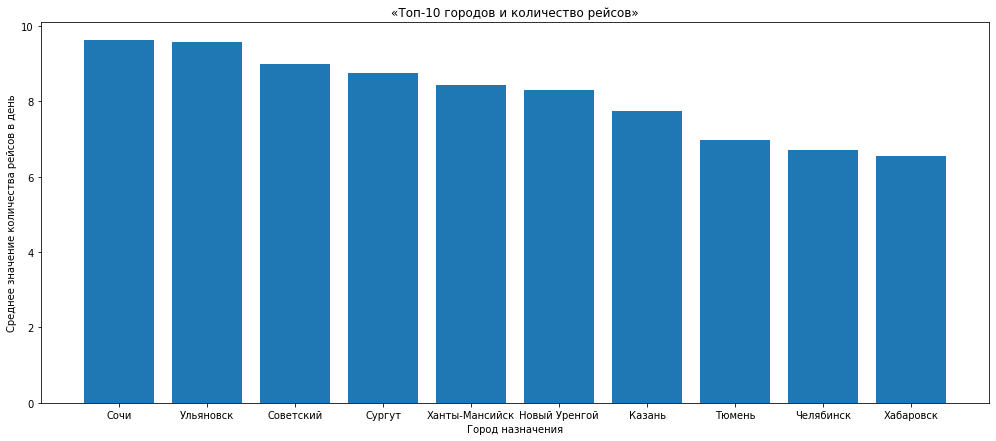

In [417]:
plt.figure(figsize=(17, 7))
plt.title("«Топ-10 городов и количество рейсов»")
plt.xlabel("Город назначения")
plt.ylabel("Cреднее значение количества рейсов в день")
plt.(top_10_city.city, top_10_city.average_flights)
plt.show()

#### Вывод
В продолжение к предыдущему графику, даже на топ 10 городах заметна разница почти на треть между топ городом (Сочи) и Хабаровском.
___

<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'>
Понятный графический и аналитический анализ. (Хотя, возможно, столбчатый график был бы нагляднее, чем линейный). Выводы, действительно, очевидные. И тем приятнее видеть их подтверждение)))<br>

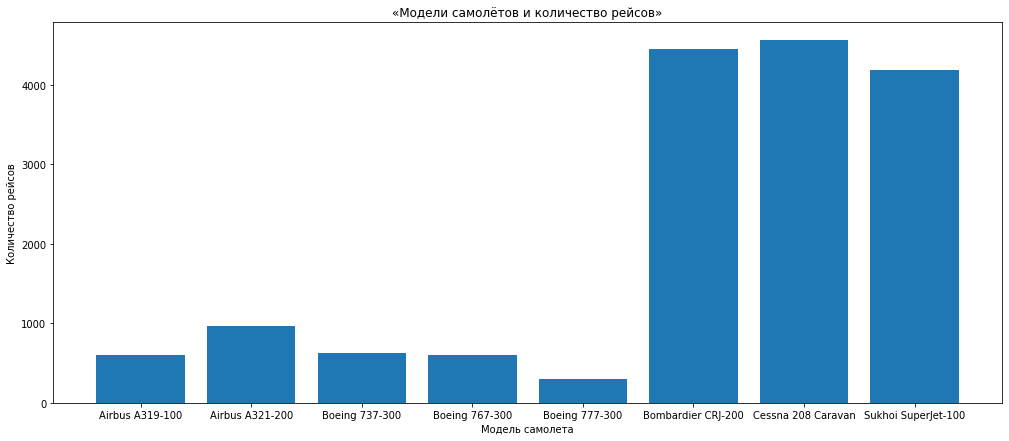

In [418]:
plt.figure(figsize=(17, 7))
plt.title("«Модели самолётов и количество рейсов»")
plt.xlabel("Модель самолета")
plt.ylabel("Количество рейсов")
plt.bar(query_1.model, query_1.flights_amount)
plt.show()

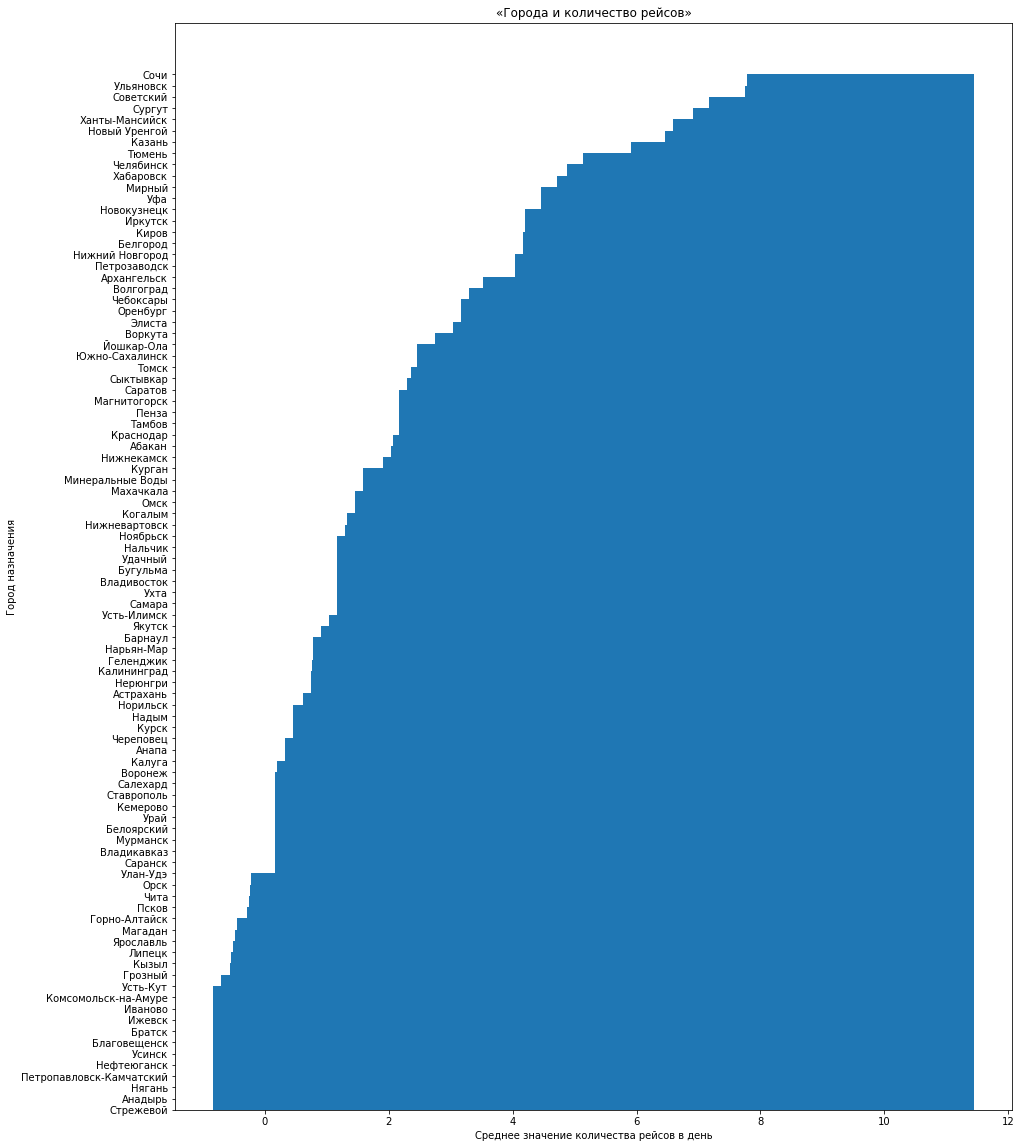

In [419]:
plt.figure(figsize=(15, 20))
plt.title("«Города и количество рейсов»")
plt.xlabel("Cреднее значение количества рейсов в день")
plt.ylabel("Город назначения")
plt.bar(query_3.average_flights, query_3.city)
plt.show()

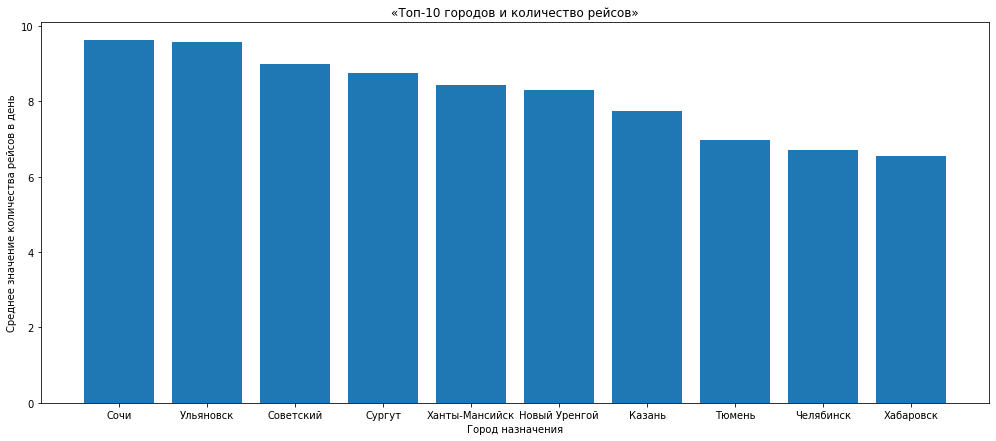

In [420]:
plt.figure(figsize=(17, 7))
plt.title("«Топ-10 городов и количество рейсов»")
plt.xlabel("Город назначения")
plt.ylabel("Cреднее значение количества рейсов в день")
plt.bar(top_10_city.city, top_10_city.average_flights)
plt.show()

На графиках «Модели самолётов и количество рейсов» и «Топ-10 городов и количество рейсов» Bar - гистограмма более показательна

# 2. Проверка гипотезы

### Формулировка
#### Нулевая гипотеза:
##### Средний спрос на билеты во время фестивалей равен среднему спросу на билеты в обычное время
#### Альтернативная гипотеза:
##### Средний спрос на билеты во время фестивалей не равен среднему спросу на билеты в обычное время

Нулевя гипотеза формулировалась из расчета равенства двух величин, альтернативная, наоборот. Сравнение будет происходить между наличием фестиваля в Москве и его отсутствием.

In [407]:
query_last.head(3)

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30,Park Live
1,31,51034,31,Пикник Афиши
2,32,51675,0,other


Общепринятые пороговые значения — 5% и 1%

In [408]:
alpha = 0.05

критический уровень статистической значимости

In [409]:
moscow_fest = query_last[query_last.festival_name != 'other']
other_fest = query_last[query_last.festival_name == 'other']

In [410]:
results = st.ttest_ind(
    moscow_fest.ticket_amount,
    other_fest.ticket_amount)

In [411]:
print('p-значение:', results.pvalue)

p-значение: 0.09688869045922928


In [412]:
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Не получилось отвергнуть нулевую гипотезу


#### Вывод
##### Рузультат показывает, что "Не получилось отвергнуть нулевую гипотезу"
Следовательно. Средний спрос на билеты во время фестивалей равен среднему спросу на билеты в обычное время.

<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>
<font color='green'>
Анатолий, действительно, работа первой части проектка на фоне других проектов кажется простой - вспомнить например, второй сборный проект)<br>
ВОзможно, о проверке гипотез стоит ещё раз поговорить.<br>
    
Ты верно применил технику сравнения групп. Есть тест, есть р-уровень. Если р-уровень меньше 0.05 , то мы гворим, что средние значения в группах статистически различаются. Т.е. мы можем сказать, что одна группа отличается от другой.<br>  
    
При этом у нас данных совсем мало 7 и 3 строк в группах сравнения.<br>
И тогда вопрос: на сколько можно доверять статистическим выводам?<br>    
Есть ещё такое мнение:<br>
Данная функция сравнения групп = st.ttest_ind - справедлива (читаем так: последующему выводу можно доверять) только в том случае, когда данные в подгруппах распределены нормально (и данных должно быть ну более 20-30 хотя бы для каждой группы). Если данные - не нормальные (или их мало как в нашем случае),то правильнее использовать метод непараметрической статистики - фукнцию mannwhitneyu (она как раз использует расчёт по медианам, когда данных мало).<br><br>
Какие последствия от неправильного использования методов сравнения двух групп? Почему важно понимать нормальность/ненормльность сравниваемых групп?<br>
А потому, что Можно сделать ложные выводы. А значит неверные управленческие решения.<br><br>
Это легко увидеть это на медицинском примере: ведь принятие решения о выводе лекарства на рынок (нового метода лечения) принимают именно используя эти техники, изучая две группы пациентов. И вот, скажем, метод расчёта показал, что гипотеза не подтвердилась - т.е. средние значени давления (допустим лекарство для снижения давления) в группах разные, т.е. лекарство реально помагает людям. И решили начать запуск лекарства на рынок. Но, т.к. использовали не тот метод анализа, вывод оказался ложным:(((<br>
т.е. не помогает оно на самом деле....<br><br>
 
Это я к тому, что вопрос достаточно серьёзный, по поводу использования техник сравнения групп между собой и принятия решения о разности между группами.<br>
И если предстоит занимтаься эти вопросом в Вашей деятельности в будущем, то лучше глубже изучить этот вопрос, чтобы на практике быть настоящим с точки зрения статистических расчётов.<br>
Ведь всё решает аналитик:))) А значит и ответственность тоже берёт на себя)))

ВОт, например, если использовать маннауитни в этой задаче, то выводы могут быть иными. Например, там критерий может показать, что статистически будут основания отвергнуть гипотезу. Т.е. спрос отличается в периоды проведения и не проведения фестивалей и управленческие выводы - уже иные могут быть. (надо ДВУСТОРОННИЙ криетрий использовать)<br>
    
Если говорить о нашей задаче, то, скорее всего, для бизнеса тут более провильно будет ответить так: данных мало, что быть уверенным в выодах на 100%, но есть подозрения, что спрос отличается в изучаемые периоды и дополниетльный сбор данных сможет это подтвердить.<br>

<font color='red'>    
Есть ли у тебя вопросы по "проверке гипотез"?

Был недостаточно внимателен. Спасибо за разъяснение. Как таковых вопросов не осталось. В предыдущем уроке на эту тему все расписно довольно понятно. 

In [414]:
results = st.mannwhitneyu(
    moscow_fest.ticket_amount,
    other_fest.ticket_amount)

In [415]:
print('p-значение:', results.pvalue)

p-значение: 0.03412374418900064


In [416]:
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Отвергаем нулевую гипотезу


#### Вывод
##### Рузультат показывает, что "Отвергаем нулевую гипотезу"
Польщуемся альтернативной гипотезой
Следовательно. Средний спрос на билеты во время фестивалей НЕ равен среднему спросу на билеты в обычное время.

<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА 2</u>
</font>
<font color='green'>
Анатолий, ОК)<br>
Обрати ещё внимание на двусторонний критерий при использовании манна-уитни.<br>
УСПЕШНОГО ДАЛЬНЕЙШЕГО ОБУЧЕНИЯ!

# Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Файлы изучены
- [x]  Типы данных проверены на корректность
- [x]  Выбран топ-10 городов по количеству рейсов
- [x]  Построен график «Модели самолётов и количество рейсов»
- [x]  Построен график «Города и количество рейсов»
- [x]  Построен график «Топ-10 городов и количество рейсов»
- [x]  Проверена гипотеза «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время»
- [x]  Есть пояснение «Как вы формулировали нулевую и альтернативную гипотезы»
- [x]  Есть пояснение «Какой критерий использовали для проверки гипотез и почему»
- [x]  На каждом этапе написаны выводы
- [x]  Написан общий вывод